In [17]:
import pandas as pd 
import os

data_path = os.path.abspath('')

In [19]:

## READ IN CPI INDEX NUMBERS

index_cv = f'{data_path}/data/CPI_All_Time_Series/640105.xls'
in_df = pd.read_excel(index_cv, sheet_name="Data1")

# include = ['Unnamed: 0', 'Index Numbers ;  Bread ;  Australia ;', "Index Numbers ;  Fruit ;  Australia ;", 'Index Numbers ;  Meat and seafoods ;  Australia ;', "Index Numbers ;  Vegetables ;  Australia ;", "Index Numbers ;  Rents ;  Australia ;", "Index Numbers ;  Clothing and footwear ;  Australia ;"]

# include = ['Unnamed: 0', 'Index Numbers ;  Meat and seafoods ;  Australia ;', "Index Numbers ;  Vegetables ;  Australia ;", "Index Numbers ;  Rents ;  Australia ;"]


# include = ['Unnamed: 0', "Index Numbers ;  Medical, dental and hospital services ;  Australia ;", "Index Numbers ;  Child care ;  Australia ;", "Index Numbers ;  Housing ;  Australia ;", "Index Numbers ;  Utilities ;  Australia ;"]

# mihl = ['Unnamed: 0', "Index Numbers ;  Food and non-alcoholic beverages ;  Australia ;", "Index Numbers ;  Clothing and footwear ;  Australia ;", "Index Numbers ;  Transport ;  Australia ;", "Index Numbers ;  Health ;  Australia ;", "Index Numbers ;  Personal care products ;  Australia ;", "Index Numbers ;  Recreation and culture ;  Australia ;"]

# include = mihl

speci = ['Unnamed: 0', "Index Numbers ;  Rents ;  Australia ;", "Index Numbers ;  Milk ;  Australia ;", "Index Numbers ;  Fruit ;  Australia ;", "Index Numbers ;  Vegetables ;  Australia ;", "Index Numbers ;  Snacks and confectionery ;  Australia ;", "Index Numbers ;  Garments ;  Australia ;"]



include = speci 

in_df = in_df[include]



headers = in_df.loc[0]

in_df = in_df[9:]

in_df['Unnamed: 0'] = pd.to_datetime(in_df['Unnamed: 0'])

# print(in_df['Unnamed: 0'])

for thing in include[1:]:
    in_df[thing] = pd.to_numeric(in_df[thing])

in_df = pd.melt(in_df, id_vars='Unnamed: 0')

in_df = in_df.rename(columns={"Unnamed: 0":"Date"})
print(in_df)



           Date                                  variable  value
0    1948-09-01     Index Numbers ;  Rents ;  Australia ;    NaN
1    1948-12-01     Index Numbers ;  Rents ;  Australia ;    NaN
2    1949-03-01     Index Numbers ;  Rents ;  Australia ;    NaN
3    1949-06-01     Index Numbers ;  Rents ;  Australia ;    NaN
4    1949-09-01     Index Numbers ;  Rents ;  Australia ;    NaN
...         ...                                       ...    ...
1735 2019-12-01  Index Numbers ;  Garments ;  Australia ;   91.1
1736 2020-03-01  Index Numbers ;  Garments ;  Australia ;   90.0
1737 2020-06-01  Index Numbers ;  Garments ;  Australia ;   90.8
1738 2020-09-01  Index Numbers ;  Garments ;  Australia ;   91.7
1739 2020-12-01  Index Numbers ;  Garments ;  Australia ;   89.6

[1740 rows x 3 columns]


In [21]:
## READ IN AVERAGE RETAIL PRICES
avg_p_cv = f'{data_path}/data/6403055001do001_201106.xls'
avg_df = pd.read_excel(avg_p_cv, sheet_name="Table_1", skiprows=4)

# print(avg_df.columns)


In [22]:
ub_ceevee = f'{data_path}/data/unemploymentsicknessandbenefits.xlsx'

ub_df = pd.read_excel(ub_ceevee)
ub_df = ub_df[['Date of effect', '21 years']]
ub_df = ub_df.dropna()

ub_df['Date of effect'] = pd.to_datetime(ub_df['Date of effect'])

ub_hundert = ub_df.loc[ub_df['Date of effect'] == '20/9/2011']['21 years'].values

ub_df['ub_index'] = (ub_df['21 years']/ub_hundert)*100

ub_df = ub_df[['Date of effect', "ub_index"]]

ub_df = ub_df.rename(columns={'Date of effect':"Date", "ub_index": "value"})
ub_df["variable"] = "Unemployment benefits"

print(ub_df)




         Date       value               variable
0  1969-09-27    4.108463  Unemployment benefits
1  1970-09-28    4.108463  Unemployment benefits
2  1971-09-29    4.108463  Unemployment benefits
3  1972-02-25    6.984388  Unemployment benefits
4  1972-09-27    6.984388  Unemployment benefits
..        ...         ...                    ...
95 2018-09-20  113.023829  Unemployment benefits
96 2019-03-20  114.153657  Unemployment benefits
97 2019-09-20  114.831553  Unemployment benefits
98 2020-03-20  116.207888  Unemployment benefits
99 2020-09-20  116.207888  Unemployment benefits

[100 rows x 3 columns]


In [23]:
# combined = pd.merge(ub_df, in_df, left_on="Date of effect", right_on="Unnamed: 0", how="left")
combined = pd.concat([ub_df, in_df])

combined = combined.loc[combined['Date'] > "1980-01-01"]

print(combined)

           Date      value                                  variable
18   1980-05-01  21.138044                     Unemployment benefits
19   1980-11-01  21.959737                     Unemployment benefits
20   1981-05-07  21.959737                     Unemployment benefits
21   1981-11-05  23.870173                     Unemployment benefits
22   1982-05-06  23.870173                     Unemployment benefits
...         ...        ...                                       ...
1735 2019-12-01  91.100000  Index Numbers ;  Garments ;  Australia ;
1736 2020-03-01  90.000000  Index Numbers ;  Garments ;  Australia ;
1737 2020-06-01  90.800000  Index Numbers ;  Garments ;  Australia ;
1738 2020-09-01  91.700000  Index Numbers ;  Garments ;  Australia ;
1739 2020-12-01  89.600000  Index Numbers ;  Garments ;  Australia ;

[1066 rows x 3 columns]


<AxesSubplot:xlabel='Date', ylabel='value'>

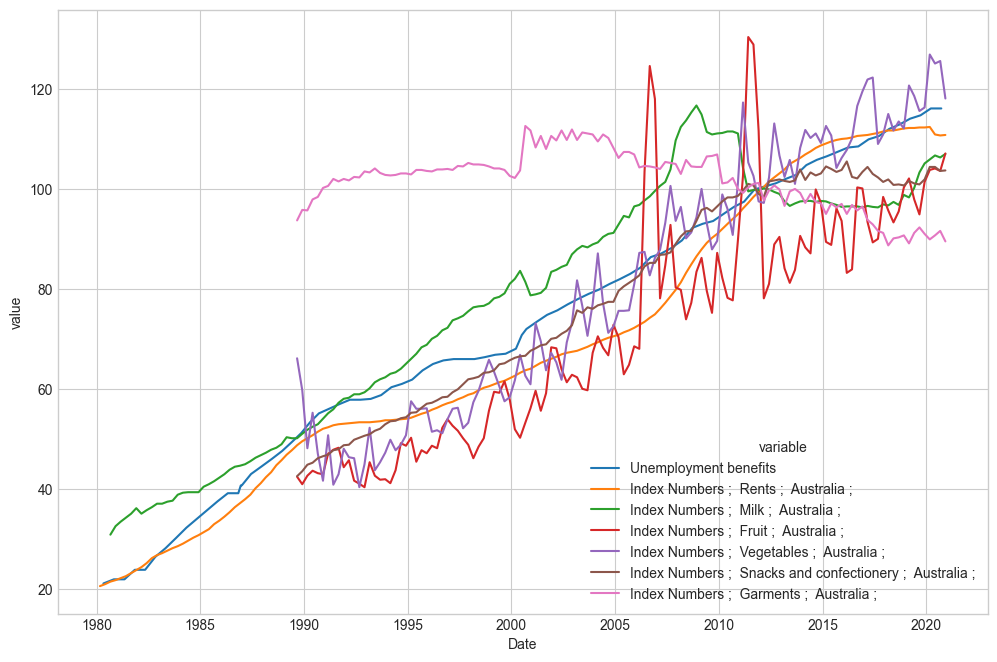

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
sns.lineplot(data = combined, x="Date", y="value", hue="variable")

# sns.lineplot(data = in_df, x="Unnamed: 0", y="Index Numbers ;  Meat and seafoods ;  Australia ;")
# # sns.lineplot(data = in_df, x="Unnamed: 0")